### Series

In [1]:
import pandas as pd
import numpy as np

obj = pd.Series([4, 5, -3, 7])
print(obj)

obj = pd.Series([4, 5, 1, -3], index = ['a', 'b', 'c', 'd'])
print(obj)
print(obj.index, obj.values)

obj.name = '인구'
obj.index.name = '도시'
print(obj)

# 백터와 연산
re = obj / 10
print(re)

0    4
1    5
2   -3
3    7
dtype: int64
a    4
b    5
c    1
d   -3
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object') [ 4  5  1 -3]
도시
a    4
b    5
c    1
d   -3
Name: 인구, dtype: int64
도시
a    0.4
b    0.5
c    0.1
d   -0.3
Name: 인구, dtype: float64


### 인덱싱(Indexing)

In [18]:
print(obj['a'], obj[0])

print(obj[[1, 3]], obj[['b', 'c']])

obj = pd.Series([5, 15, 50])
# 필터링
obj[(250e4 < obj) & (obj < 500e4)]

# 슬라이싱
print(obj[0:1])

s1 = pd.Series(range(3), index= ['a', 'b', 'c'])
print(s1.a, s1.b)

4 4
도시
b    5
d   -3
Name: 인구, dtype: int64 도시
b    5
c    1
Name: 인구, dtype: int64
0    5
dtype: int64
0 1


obj = pd.Series([4, 5, -3, 7])

print('a' in obj)
for k, v in obj.items():
    print('%s = %d'%(k, v))
    
# dict형을 Series형으로 변환
s2 = pd.Series({'서울': 1234, '부산': 3333, '인천': 55555}, index=['서울', '인천', '부산'])
print(s2)

### 인덱스 기반 연산

In [35]:
print(s2.values - s1.values)
print(s2.notnull())

s1 = pd.Series({'서울': 5555, '부산': 3334, '인천': 6000}, index=['서울', '인천', '부산'])

rs = (s1 - s2)/s2 * 100
rs = rs[rs.notnull()]
print(rs)

[ 1234 55554  3331]
서울    True
인천    True
부산    True
dtype: bool
서울    350.162075
인천    -89.199892
부산      0.030003
dtype: float64


### 데이터의 갱신, 추가, 삭제

In [36]:
rs['부산'] = 1.63

rs['대구'] = 1.5

del rs['인천']

rs

서울    350.162075
부산      1.630000
대구      1.500000
dtype: float64

### DataFrame

In [4]:
#생성

data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
cols = ['지역', '2000', '2005', '2010', '2015', '2010-2015 증가율']
idx = ['서울', '부산', '인천', '대구']
frame = pd.DataFrame(data, columns = cols, index = idx)

print(frame.values)
print(frame.columns)
print(frame.index)

frame.index.name = '도시'
frame.columns.name = '특성'
frame

frame.T

[['수도권' 9853972 9762546 9631482 9904312 0.0283]
 ['경상권' 3655437 3512547 3393191 3448737 0.0163]
 ['수도권' 2466338 2517680 2632035 2890451 0.0982]
 ['경상권' 2473990 2456016 2431774 2466052 0.0141]]
Index(['지역', '2000', '2005', '2010', '2015', '2010-2015 증가율'], dtype='object')
Index(['서울', '부산', '인천', '대구'], dtype='object')


도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2000,9853972,3655437,2466338,2473990
2005,9762546,3512547,2517680,2456016
2010,9631482,3393191,2632035,2431774
2015,9904312,3448737,2890451,2466052
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


### 열 인덱싱

In [79]:
frame['지역']
frame[['2010', '2015']]

print(type(frame['2010']))
print(type(frame[['2010']]))

print('2005-서울', frame['2005']['서울'])
print(frame.loc['서울'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
2005-서울 9762546
특성
지역                    수도권
2000              9853972
2005              9762546
2010              9631482
2015              9904312
2010-2015 증가율    2.83e+06
Name: 서울, dtype: object


### 열 데이터의 갱신, 추가, 삭제

In [76]:
frame['2010-2015 증가율'] = frame['2010-2015 증가율'] * 100
frame['2005-2010 증가율'] = ((frame['2010'] - frame['2005'])/frame['2005'] * 100).round(2)

del frame['2005-2010 증가율']
frame

특성,지역,2000,2005,2010,2015,2010-2015 증가율
도시,,,,,,
서울,수도권,9853972,9762546,9631482,9904312,2830000.0
부산,경상권,3655437,3512547,3393191,3448737,1630000.0
인천,수도권,2466338,2517680,2632035,2890451,9820000.0
대구,경상권,2473990,2456016,2431774,2466052,1410000.0


### 행 단위 인덱싱 : 반드시 슬라이싱

In [7]:
print(frame[:1])
print(frame[1:2])
print(frame['서울' : '부산'])

특성   지역     2000     2005     2010     2015  2010-2015 증가율
도시                                                        
서울  수도권  9853972  9762546  9631482  9904312         0.0283
특성   지역     2000     2005     2010     2015  2010-2015 증가율
도시                                                        
부산  경상권  3655437  3512547  3393191  3448737         0.0163
특성   지역     2000     2005     2010     2015  2010-2015 증가율
도시                                                        
서울  수도권  9853972  9762546  9631482  9904312         0.0283
부산  경상권  3655437  3512547  3393191  3448737         0.0163


### 데이터 입출력

    csv파일 입력

In [26]:
sample1 = pd.read_csv('data/sample1.csv')

sample2 = pd.read_csv('data/sample2.csv', names = ['c1', 'c2', 'c3'])

# 특정한 열을 인덱스로 지정하고 싶다면
sample1 = pd.read_csv('data/sample1.csv', index_col = 'c1')
sample1[:1]

,c2,c3
c1,,
1,1.11,one


In [ ]:
#magic 명령어(Jupyter에서만 사용가능)

In [40]:
%%writefile data/sample3.txt  
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting data/sample3.txt


In [43]:
# (Regular Expression) \s : space, + : 한개 이상
sample3 = pd.read_table('data/sample3.txt', sep = '\s+')    
sample3

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


In [50]:
%%writefile data/sample.txt
파일 제목 : sample.txt
데이터 포멧의 설명 : metadata가 포함된 파일
c1, c2, c3 
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting data/sample.txt


In [51]:
sample = pd.read_csv('data/sample.txt', skiprows=[0, 1])
sample

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [57]:
%%writefile data/sample.csv
c1, c2, c3 
1, 1.11, one
2, 2.22, two
누락, 3.33, three

Overwriting data/sample.csv


In [58]:
sample = pd.read_csv('data/sample.csv', na_values = ['누락'])
sample

,c1,c2,c3
0,1.0,1.11,one
1,2.0,2.22,two
2,NaN,3.33,three


### csv 파일 출력

In [60]:
df = pd.read_csv('data/sample1.csv')
df.to_csv('data/sample1-1.txt')

In [71]:
!type data\sample.csv

c1, c2, c3 
1, 1.11, one
2, 2.22, two
�늻�씫, 3.33, three


In [72]:
df.to_csv('data/sample2.csv', sep = '|')
!type data\sample2.csv

|c1| c2| c3 
0|1|1.11| one
1|2|2.22| two
2|3|3.33| three


In [75]:
sample.to_csv('data/sample_1.csv', na_rep='누락')
!type data\sample_1.csv

,c1, c2, c3 
0,1.0,1.11, one
1,2.0,2.22, two
2,�늻�씫,3.33, three


In [84]:
# index, header인수를 지정하여 인덱스 및 헤더 출려여부 지정
df.index = ['a', 'b', 'c']
df.to_csv('data/sample_2.csv', index = False, header = False)

!type data\sample_2.csv

1,1.11, one
2,2.22, two
3,3.33, three


In [121]:
# csv모듈을 사용하지 않고 파이썬 기본 문법으로만 사용
input_file = 'data/input.csv'
output_file = 'data/output.csv'

with open(input_file, 'r') as reader:
    with open(output_file, 'w') as writer:
        header = reader.readline().strip()
        header_list = header.split(',')      
        writer.write(', '.join(map(str, header_list)) + '\n')
        
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            writer.write(','.join(map(str, row_list)) + '\n')

['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']


### 데이터 프레임 인덱서
    loc : 라벨값 기반의 2차원 인덱싱 (행과 열의 인덱스로 접근)
    iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱
    ix : 라벨과 순서기반 둘다 사용
    at : 라벨값 기반의 2차원 인덱싱(한계의 스칼라 값만 찾는다)
    iat : 순서를 나타내는 정수 기반의 2차원 인덱싱(한계의 스칼라 값만 찾는다)

In [120]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4), index=['a', 'b', 'c'], columns=['A', 'B', 'C', 'D'])
print(df)
df.loc['a' , 'A']
df.loc['b': , 'A']
df.loc['a', :]
df.loc[['a', 'b'], ['B', 'D']]
df.loc[df.A > 10]              # df.loc[df.A > 10, :] 와 동일

    A   B   C   D
a  10  11  12  13
b  14  15  16  17
c  18  19  20  21


,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [128]:
print(type(df[1:2]))

print(df.loc['b'])          # 인덱스로 접근할때는 series type

<class 'pandas.core.frame.DataFrame'>
A    14
B    15
C    16
D    17
Name: b, dtype: int32
<class 'pandas.core.series.Series'>


In [130]:
def select_rows(df):
    return df.A > 12

df.loc[select_rows(df), ['B']]

    B
b  15
c  19


In [139]:
# 모든 행에 대해서 첫번째 행에 있는 값이 11보다 작거나 같은 행에 대해 모든 컬럼을 추출
df.loc[:, df.loc['a', :] <= 11]

df.loc['e'] = [90, 91, 92, 93]
df.loc['c'] = [18, 29, 20, 222]
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,29,20,222
e,90,91,92,93


In [141]:
df = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns = np.arange(1, 8, 2))
df.loc[:1]            # index를 레이블로 보기때문에 1를 포함

,1,3,5,7
0,10,11,12,13
1,14,15,16,17


    iloc인덱서

In [151]:
print(df)
df.iloc[0, 1]
df.iloc[:2, 2]
df.iloc[0, -2]
print(df.iloc[2:3, 1:3])
df.iloc[-1] = df.iloc[-1] * 2

     1    3    5    7
0   10   11   12   13
1   14   15   16   17
2   18   19   20   21
3  176  184  192  200
    3   5
2  19  20
1    176
3    184
5    192
7    200
Name: 3, dtype: int32


### 데이터프레임의 데이터 조작

In [157]:
s = pd.Series(range(10))
s[3] = np.nan


print(s.count())               # NAN 즉 결측치를 제외하고 count

9


In [4]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype = float)
df.iloc[2, 3] = np.nan

df.count()

0    4
1    4
2    4
3    3
dtype: int64

### 카테고리 값 세기

In [5]:
np.random.seed(1)
s = pd.Series(np.random.randint(6, size=100))
s.head()
s.tail()

s.value_counts()

df[0].value_counts()

3.0    2
4.0    1
0.0    1
Name: 0, dtype: int64

### 정렬
    sort_index()
    sort_value()

In [52]:
s.value_counts().sort_index()
s.sort_values(ascending=False)                         # 결측치(NaN)는 맨 마지막에 

personDf = pd.DataFrame({'sequence': [1, 3, 2], 'name': ['park', 'lee', 'choi'], 'age': [30, 20, 40]})
print(personDf)

personDf.sort_values(by = ['sequence', 'age'])
personDf.sort_values(by = ['sequence'], axis = 0)  # 0: row의 index, 1: 컬럼명(알파벳 순) 정렬
personDf.sort_values(by = ['sequence'], ascending = True)

personDf.sort_index(axis = 1)     # index순 정렬   
personDf.sort_index(axis = 1, ascending=False)

personDf.sort_values(by=['sequence'], axis=0, ascending= False,inplace=True)


personDf = pd.DataFrame({'sequence': [1, 3, np.nan], 'name': ['park', 'lee', 'choi'], 'age': [30, 20, 40]})
personDf.sort_values(by = ['sequence'], axis = 0, na_position = 'first')
personDf.sort_values(by = ['sequence'], axis = 0, na_position = 'last')

   sequence  name  age
0         1  park   30
1         3   lee   20
2         2  choi   40


,age,name,sequence
0,30,park,1.0
1,20,lee,3.0
2,40,choi,NaN


### 행/열 합계


In [63]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(10, size = (4, 5)))
print(df)

df.sum(axis = 0)
df.sum(axis = 1)

df['rowsum'] = df.sum(axis = 1)
df['colsum'] = df.sum(axis = 0)
del df['colsum']
df

df.loc['colsum'] = df.sum(axis = 0)
df

   0  1  2  3  4
0  5  8  9  5  0
1  0  1  7  6  9
2  2  4  5  2  4
3  2  4  7  7  9


,0,1,2,3,4,rowsum
0,5,8,9,5,0,27
1,0,1,7,6,9,23
2,2,4,5,2,4,17
3,2,4,7,7,9,29
colsum,9,17,28,20,22,96


### apply 변환
    행이나 열 단위로 더 복잡한 처리를 하고 싶을 때는 apply()를 사용
    인수로 행 또는 열을 받는 함수를 apply의 인수로 넣으면 각 열(또는 행)을 반복하여 그 함수에 적욛

In [85]:
df = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})

'''
def diff(x):
    return x.max() - x.min()

df.apply(diff)
'''

df.apply(lambda x: x.max() - x.min())

# 각 열에 대해 어떤 값이 얼마나 사용되는었는지 알고 싶다.
df.apply(pd.value_counts)

# fillna(): NaN을 원하는 값으로 변경   astype(): 원하는 type으로 변경
df.apply(pd.value_counts).fillna(0).astype(int)

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


### 실수값을 카테고리 값으로 변환
    cut(데이터, 기준, 레이블)
    qcut()

In [106]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]

bins = [1, 15, 25, 35, 60, 99]
labels = ['미성년자', '청년', '중년', '장년', '노년']

generation = pd.cut(ages, bins, labels=labels)
generation

print(generation.categories)
print(generation.codes)


df = pd.DataFrame(ages, columns=['ages'])
df['age_cat'] = pd.cut(ages, bins, labels = labels)


Index(['미성년자', '청년', '중년', '장년', '노년'], dtype='object')
[-1  0  0  1  1  3  2  4  1  3  2 -1]


,ages,age_cat
0,0,NaN
1,2,미성년자


In [109]:
data = np.random.randn(100)
cats = pd.qcut(data, 4, labels=['1단계', '2단계', '3단계', '4단계'])

pd.value_counts(cats)

4단계    25
3단계    25
2단계    25
1단계    25
dtype: int64

### 데이터프레임 인덱스 설정 및 제거
    set_index()
    reset_index()

In [158]:
np.random.seed(0)

df = pd.DataFrame(np.vstack([list('ABCDE'), np.round(np.random.rand(3, 5), 1)]).T, columns= ['c1', 'c2', 'c3', 'c4'])

df1 = df.set_index('c1')
df1.set_index('c2')
df2 = df1.reset_index()
df2

,c1,c2,c3,c4
0,A,0.5,0.6,0.8
1,B,0.7,0.4,0.5
2,C,0.6,0.9,0.6
3,D,0.5,1.0,0.9
4,E,0.4,0.4,0.1


### 다중 인덱스

In [224]:
np.random.seed(0)

df = pd.DataFrame(np.round(np.random.randn(5, 4), 2), columns=[['A', 'A', 'B', 'B'], ['c1', 'c2', 'c1', 'c2']])
df.columns.names = ['cidx1', 'cidx2']
print(df)
print(df[('A', 'c1')])
df.loc[0, ('A', 'c1')]

df.iloc[0, 2]
df['A']

cidx1     A           B      
cidx2    c1    c2    c1    c2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85
0    1.76
1    1.87
2   -0.10
3    0.76
4    1.49
Name: (A, c1), dtype: float64


cidx2,c1,c2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


In [227]:
np.random.seed(0)
df = pd.DataFrame(np.round(np.random.randn(6, 4), 2), columns = [['A', 'A', 'B', 'B'], ['C', 'D', 'C', 'D']], 
                  index = [['M', 'M', 'M', 'F', 'F', 'F'], ['id_' + str(i + 1) for i in range(3)] *2])
df.columns.names = ['cidx1', 'cidx2']
df.index.names = ['Gender', 'ID']

print(df)
print(df.loc[('M', 'id_1'), ('A', 'C')])
print(df.loc[:, ('A', 'C')])
print(df.loc[('M', 'id_1'), :])
df
df.loc[('All', 'All'), :] = df.sum()
df

cidx1           A           B      
cidx2           C     D     C     D
Gender ID                          
M      id_1  1.76  0.40  0.98  2.24
       id_2  1.87 -0.98  0.95 -0.15
       id_3 -0.10  0.41  0.14  1.45
F      id_1  0.76  0.12  0.44  0.33
       id_2  1.49 -0.21  0.31 -0.85
       id_3 -2.55  0.65  0.86 -0.74
1.76
Gender  ID  
M       id_1    1.76
        id_2    1.87
        id_3   -0.10
F       id_1    0.76
        id_2    1.49
        id_3   -2.55
Name: (A, C), dtype: float64
cidx1  cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64


cidx1           A           B      
cidx2           C     D     C     D
Gender ID                          
M      id_1  1.76  0.40  0.98  2.24
       id_2  1.87 -0.98  0.95 -0.15
       id_3 -0.10  0.41  0.14  1.45
F      id_1  0.76  0.12  0.44  0.33
       id_2  1.49 -0.21  0.31 -0.85
       id_3 -2.55  0.65  0.86 -0.74
All    All   3.23  0.39  3.68  2.28

In [184]:
# 행 인덱스와 열 인덱스 교환 : stack(): 열 -> 행        unstack(): 행 -> 열
df.stack('cidx1')
df.stack(1)      #cidx2

df.unstack(0)
df.unstack('ID')

cidx1     A                             B                         
cidx2     C              D              C              D          
ID     id_1 id_2 id_3 id_1 id_2 id_3 id_1 id_2 id_3 id_1 id_2 id_3
Gender                                                            
F       0.8  1.5 -2.6  0.1 -0.2  0.7  0.4  0.3  0.9  0.3 -0.9 -0.7
M       1.8  1.9 -0.1  0.4 -1.0  0.4  1.0  1.0  0.1  2.2 -0.2  1.5

In [238]:
# 다중인덱스의 인덱스 순서 교환: swaplevel(i, j, axis)

print(df)
df = df.swaplevel('Gender', 'ID', 0)
df

df1 = df.swaplevel('cidx1', 'cidx2', 1)
df1

cidx1           A           B      
cidx2           C     D     C     D
Gender ID                          
M      id_1  1.76  0.40  0.98  2.24
       id_2  1.87 -0.98  0.95 -0.15
       id_3 -0.10  0.41  0.14  1.45
F      id_1  0.76  0.12  0.44  0.33
       id_2  1.49 -0.21  0.31 -0.85
       id_3 -2.55  0.65  0.86 -0.74
All    All   3.23  0.39  3.68  2.28


,cidx2,C,D,C,D
,cidx1,A,A,B,B
ID,Gender,,,,
id_1,M,1.76,0.40,0.98,2.24
id_2,M,1.87,-0.98,0.95,-0.15
id_3,M,-0.10,0.41,0.14,1.45
id_1,F,0.76,0.12,0.44,0.33
id_2,F,1.49,-0.21,0.31,-0.85
id_3,F,-2.55,0.65,0.86,-0.74
All,All,3.23,0.39,3.68,2.28


In [247]:
df = df.swaplevel('ID', 'Gender', 0)
df.sort_index(level=0)
df1.sort_index(level=0, axis=1)

cidx2           C           D      
cidx1           A     B     A     B
ID   Gender                        
id_1 M       1.76  0.98  0.40  2.24
id_2 M       1.87  0.95 -0.98 -0.15
id_3 M      -0.10  0.14  0.41  1.45
id_1 F       0.76  0.44  0.12  0.33
id_2 F       1.49  0.31 -0.21 -0.85
id_3 F      -2.55  0.86  0.65 -0.74
All  All     3.23  3.68  0.39  2.28

### 데이터 프레임 병합(합성)
    merge : 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다
            이때 기준이 되는 열, 행의 데이터를 key라고 한다.

In [319]:
df1 = pd.DataFrame({
    'customer': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    'name': ['CoCo', 'Judy', 'Phoo', 'Candy', 'Apeach', 'Lion', 'Mikey']
}, columns = ['customer', 'name'])

df2 = pd.DataFrame({
    'customer': [1001, 1001, 1004, 1006, 1005, 1008],
    'price': [10000, 30000, 1550000, 500000, 17000, 1000000]
}, columns = ['customer', 'price'])

pd.merge(df1, df2)
pd.merge(df1, df2, how = 'left')
pd.merge(df1, df2, how = 'right')
pd.merge(df1, df2, how = 'outer')


TypeError: concat() got multiple values for argument 'axis'

In [289]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]
}, columns=['품종', '꽃잎길이'])

df2 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎넓이': [0.4, 0.3, 0.5, 0.3]
}, columns=['품종', '꽃잎넓이'])

pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎넓이
0,setosa,1.4,0.4
1,setosa,1.4,0.3
2,setosa,1.3,0.4
3,setosa,1.3,0.3
4,virginica,1.5,0.5
5,virginica,1.5,0.3
6,virginica,1.3,0.5
7,virginica,1.3,0.3


In [292]:
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
print(df1)
print("------------------------------")

df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
print(df2)
print("------------------------------")

pd.merge(df1, df2, on = '고객명')

  고객명          날짜     데이터
0  춘향  2018-01-01   20000
1  춘향  2018-01-02   30000
2  몽룡  2018-01-01  100000
------------------------------
  고객명 데이터
0  춘향  여자
1  몽룡  남자
------------------------------


,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [295]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
print(df1)
print("------------------------------")


df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
print(df2)
print("------------------------------")

pd.merge(df1, df2, left_on = '이름', right_on = '성명')

   이름  성적
0  영희   1
1  철수   2
2  철수   3
------------------------------
   성명  성적2
0  영희    4
1  영희    5
2  철수    6
------------------------------


,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [299]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
print(df1)
print("------------------------------")


df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
print(df2)
print("------------------------------")

pd.merge(df1, df2, left_on = ['도시', '연도'], right_index = True)

   도시    연도       인구
0  서울  2000  9853972
1  서울  2005  9762546
2  서울  2010  9631482
3  부산  2000  3655437
4  부산  2005  3512547
------------------------------
         데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11
------------------------------


,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [306]:
df1 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['서울', '부산'])
print(df1)
print("------------------------------")


df2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['대구', '광주'])
print(df2)
print("------------------------------")

pd.merge(df1, df2, left_index = True, right_index = True, how='outer')

    서울   부산
a  1.0  2.0
c  3.0  4.0
e  5.0  6.0
------------------------------
     대구    광주
b   7.0   8.0
c   9.0  10.0
d  11.0  12.0
e  13.0  14.0
------------------------------


,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### concat
    데이터 연결, 위/아래로 데이터 행을 연결(인덱스가 중복 될 수 있다.)

In [327]:
s1 = pd.Series([0, 1], index = ['A', 'B'])
s2 = pd.Series([2, 3, 4], index = ['A', 'B', 'C'])
pd.concat([s1, s2])
print(pd.concat([s1, s2]))

A    0
B    1
A    2
B    3
C    4
dtype: int64


In [318]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2'])
print(df1)
print("------------------------------")

df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4'])
print(df2)
print("------------------------------")

print(pd.concat([df1, df2]))
pd.concat([df1, df2], axis = 1)

   데이터1  데이터2
a     0     1
b     2     3
c     4     5
------------------------------
   데이터3  데이터4
a     5     6
c     7     8
------------------------------
   데이터1  데이터2  데이터3  데이터4
a   0.0   1.0   NaN   NaN
b   2.0   3.0   NaN   NaN
c   4.0   5.0   NaN   NaN
a   NaN   NaN   5.0   6.0
c   NaN   NaN   7.0   8.0


C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,데이터1,데이터2,데이터3,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


### 피봇 테이블과 그룹 분석
    pivot(행, 열, 데이터)

In [27]:
data = {
    "도시": [
        "서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"
    ],
    "연도": [
        "2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"
    ],
    "인구": [
        9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 2632035
    ],
    "지역": [
        "수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"
    ]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [324]:
df1.pivot('도시', '연도', '인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632035.0,2890451.0


In [328]:
df1.set_index(['도시', '연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN  2632035.0  2890451.0

### 그룹 분석 : groupby()
    특정 조건에 맞는 데이터가 하나 이상, 즉 그룹을 이루는 경우에 사용
    피봇 테이블과 달리 키에 의해서 결정되는 데이터가 여러 개 있어도 괜찮다.
    

### 그룹 연산 메서드
    size(), count() : 갯수
    mean(), median(), min(), max()
    sum(), prod(), std(), var(), quantile()
    first(), last()
    agg(), aggregate()
        만약 원하는 그룹 연산이 없을 경우 함수를 만들고 이 함수를 agg()의 인자로 전달
        또는 여러가지 그룹 연산을 동시에 하고 싶은 경우 함수이름 문자열 리스트로 전달
        하나의 값을 처리
    describe()
        하난의 르룹 대표값이 아닌 여러 개의 값을 데이터의 프레임으로 구함
    apply()
        하나의 대표값이 아니라 데이터프레임으로 출력 
    transform()
        그룹에 대한 대표값을 만드는 것이 아니고 그룹별 계산을 통해 데이터 자체를 변경
       
        
https://pandas.pydata.org/pandas-docs/stable/api.html#groupby

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [13]:
df2.groupby(df2.key1).sum()

# key1에 대해서 data1값만 추출
df2.data1.groupby(df2.key1).sum()
df2.groupby(df2.key1)['data1'].sum()
df2.groupby(df2.key1).sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

In [26]:
# 복합키 (key1, key2)에 따른 data1의 합계
print(df2.data1.groupby([df2.key1, df2.key2]).sum())
df2.groupby(['key1', 'key2'])['data1'].sum().unstack()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64


key2,one,two
key1,,
A,6,2
B,3,4


In [32]:
df1
df1.groupby(['지역', '연도']).sum().unstack()

인구                    
연도      2005      2010      2015
지역                              
경상권  3512547   3393191   3448737
수도권  9762546  12263517  12794763

In [34]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [42]:
iris.groupby(['species']).describe().T

species                setosa  versicolor  virginica
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000

In [47]:
def max3(df):
    return df.sort_values(by = 'petal_length')[:3]

iris.groupby(['species']).apply(max3).T

species       setosa                  versicolor                          \
                 22      13      14          98          93          57    
sepal_length     4.6     4.3     5.8         5.1           5         4.9   
sepal_width      3.6       3       4         2.5         2.3         2.4   
petal_length       1     1.1     1.2           3         3.3         3.3   
petal_width      0.2     0.1     0.2         1.1           1           1   
species       setosa  setosa  setosa  versicolor  versicolor  versicolor   

species       virginica                        
                    106        126        138  
sepal_length        4.9        6.2          6  
sepal_width         2.5        2.8          3  
petal_length        4.5        4.8        4.8  
petal_width         1.7        1.8        1.8  
species       virginica  virginica  virginica

In [67]:
def q3cut(s):
    return pd.qcut(s, 3, labels=['소', '중', '대'])

iris['petal_length_class'] = iris.groupby(iris.species)['petal_length'].transform(q3cut)
iris[['petal_length_class', 'petal_length']].head()

,petal_length_class,petal_length
0,소,1.4
1,소,1.4
2,소,1.3
3,중,1.5
4,소,1.4


### pivot_table()
    pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')
    - data : 분석할 데이터프레임
    - values : 분석할 데이터프레임에서 분석할 열
    - index : 행 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - columns : 열 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - aggfunc : 분석 메서드
    - fill_value : NaN 대체값
    - margins: 오른쪽과 아래에 합계를 붙일지 여부
    - margins_name : 합계 열(행)의 이름

In [73]:
print(df2)
df2.pivot_table(values = 'data1', index = 'key1', columns = 'key2', aggfunc = 'sum')
df2.pivot_table('data1', 'key1', 'key2', 'sum')

  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
2    B  one      3     30
3    B  two      4     40
4    A  one      5     50


key2,one,two
key1,,
A,6,2
B,3,4


In [75]:
df2.pivot_table('data1', 'key1', 'key2', 'sum', margins=True, margins_name='합계')

key2,one,two,합계
key1,,,
A,6,2,8
B,3,4,7
합계,9,6,15


In [78]:
df2.pivot_table('data1', index=['key1', 'key2'])

data1
key1 key2       
A    one       3
     two       2
B    one       3
     two       4

### 데이터 시각화(matplotlib)

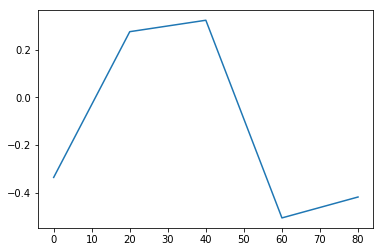

In [30]:
%matplotlib inline

s = pd.Series(np.random.randn(5).cumsum(), index = np.arange(0, 100, 20))

s.plot()

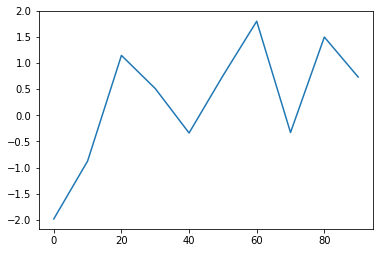

In [34]:
df = pd.DataFrame(np.random.randn(10, 4), columns = ['A', 'B', 'C', 'D'], index = np.arange(0, 100, 10))
#df.plot()

df['B'].plot()

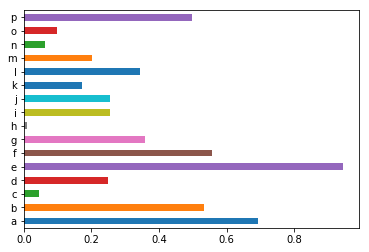

In [39]:
s = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
#s.plot(kind = 'bar')
s.plot(kind = 'barh')

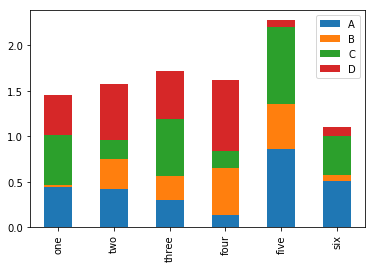

In [56]:
np.random.seed(2)

df = pd.DataFrame(np.random.rand(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = ['A', 'B', 'C', 'D'])

df.plot(kind = 'bar', stacked=True)

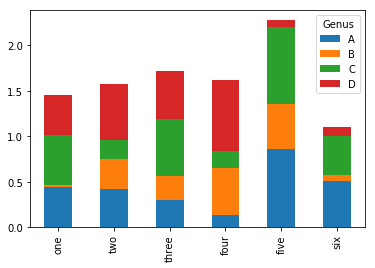

In [57]:
np.random.seed(2)
df = pd.DataFrame(np.random.rand(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar', stacked=True)

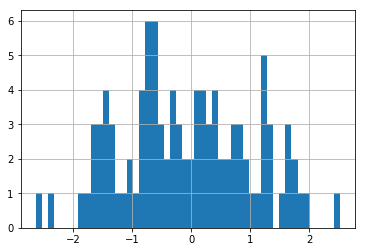

In [73]:
# 히스토그램 : x변수가 가질 수 있는 값의 구간, 갯수를 막대 그래프로 표현
# 값만 필요하고 인덱스 필요하지 않음
# x축 구간은 기본적으로 10개의 갯수를 갖는다

s = pd.Series(np.random.normal(0, 1, size = 100))
s.head()
s.hist(bins = 50)        # bins: x축 구간 갯수를 설정

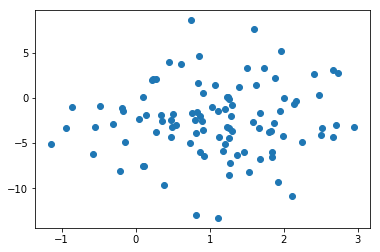

In [87]:
# 산점도(산포도) : 서로 다른 독립변수 x1, x2의 관계 파악할 때 사용

x1 = np.random.normal(1, 1, size = (100, 1))
x2 = np.random.normal(-2, 4, size = (100, 1))

x = np.concatenate((x1, x2), axis=1)

df = pd.DataFrame(x, columns = ['x1', 'x2'])
df.head()

import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x = df['x1'], y = df['x2'])

### matplotlib 사용법

In [88]:
#import matplotlib
from matplotlib import pyplot as plt

In [164]:
# http://opendata.comune.fi.it/od/temperature_2014.csv
import csv
from datetime import datetime

filename = 'data/temperature_2014.csv'

with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter = ';')
    header = next(reader)
    
    dates, highTemp, lowTemp = [], [], []
    
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], '%d/%m/%Y')
            highs = row[1].replace(',', '.')
            lows = row[2].replace(',', '.')
        except ValueError as e:
            print(e, 'current_date', 'missing date')
        else:
            dates.append(current_date)
            highTemp.append(highs)
            lowTemp.append(lows)


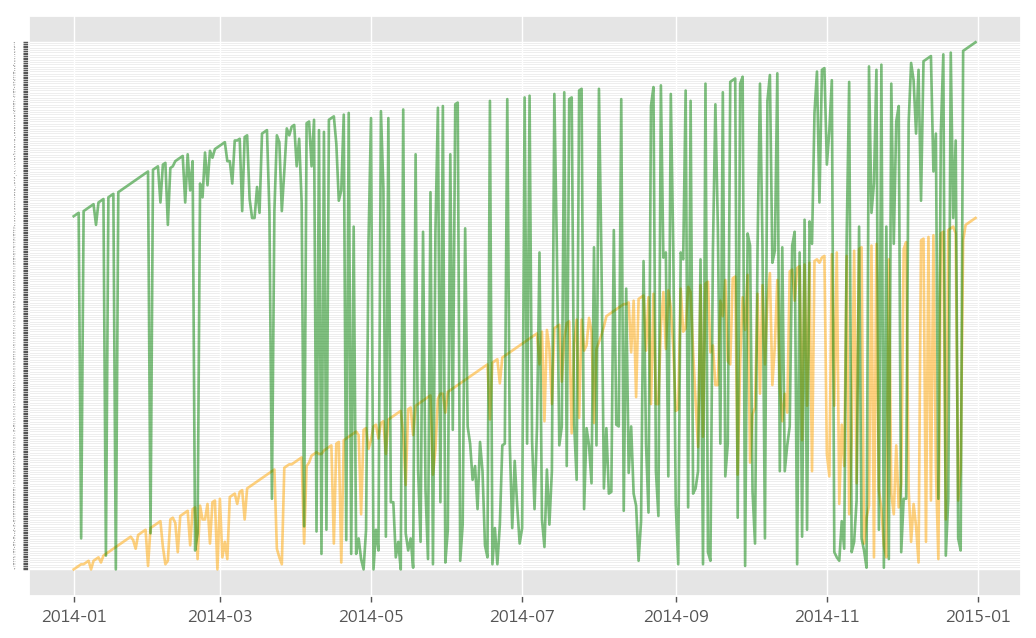

In [178]:
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highTemp, c = 'orange', alpha = 0.5)
plt.plot(dates, lowTemp, c = 'green', alpha = 0.5)
plt.tick_params(axis = 'y', labelsize = 1)

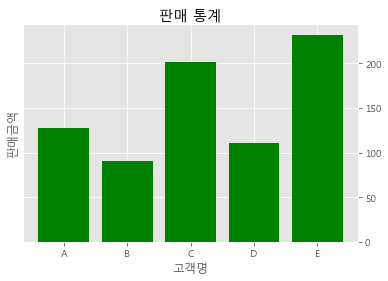

In [147]:
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font', family = font_name)

customers = ['A', 'B', 'C', 'D', 'E']
customers_index = range(len(customers))
sale_amouns = [127, 90, 201, 111, 232]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(customers_index, sale_amouns, color = 'green')
#ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('right')


plt.xticks(customers_index, customers)              # x축 값을 설정
plt.xlabel('고객명')
plt.ylabel('판매금액')
plt.title('판매 통계')
plt.style.use('ggplot')
plt.show()

In [148]:
import seaborn as sns

tips = sns.load_dataset('tips')

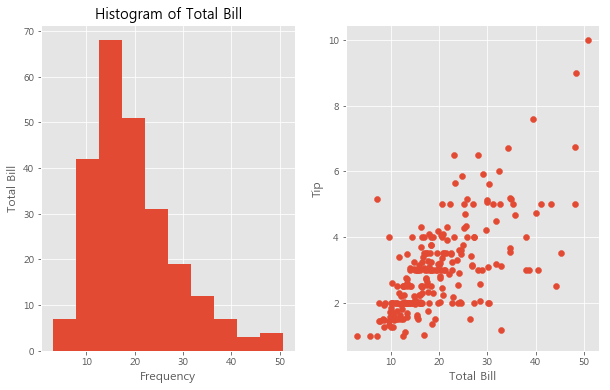

In [190]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(tips['total_bill'], bins = 10)
ax1.set_title("Histogram of Total Bill")
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Total Bill')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(tips['total_bill'], tips['tip'])
ax2.set_xlabel('Total Bill')
ax2.set_ylabel('Tip')

plt.show()

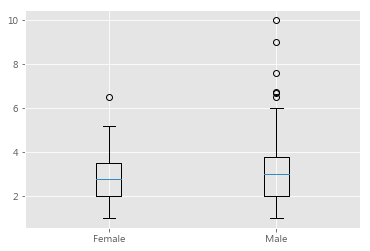

In [203]:
# box
fig = plt.figure()
plt.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex'] == 'Male']['tip']], labels = ['Female', 'Male'])
plt.show()

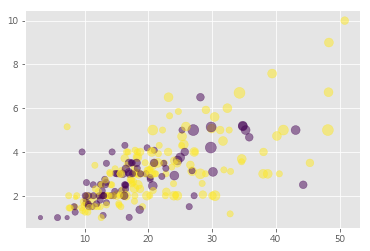

In [217]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].agg(recode_sex)
tips.head()

plt.scatter(x = tips['total_bill'], y = tips['tip'], c = tips['sex_color'], alpha = 0.5, s = tips['size']*20)

C:\Users\acorn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Probability')

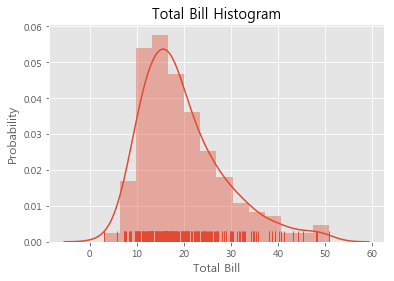

In [250]:
# seaborn을 이용한 히스토그램

#ax = sns.distplot(tips['total_bill'], kde = True)    # kde는 밀집도 옵션
#ax = sns.distplot(tips['total_bill'], hist=False)
ax = sns.distplot(tips['total_bill'], rug = True)

ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Probability')

Text(0.5,1,'Count of days')

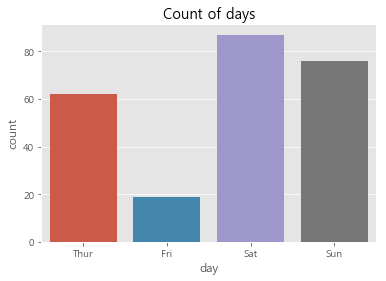

In [238]:
# ax = plt.subplot()

ax = sns.countplot('day', data = tips)   # tips['day']
ax.set_title('Count of days')

C:\Users\acorn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Total')

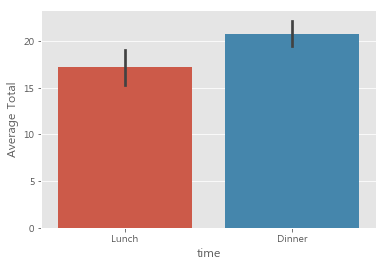

In [248]:
ax = sns.barplot(x = 'time', y = 'total_bill', data = tips)
ax.set_ylabel('Average Total')

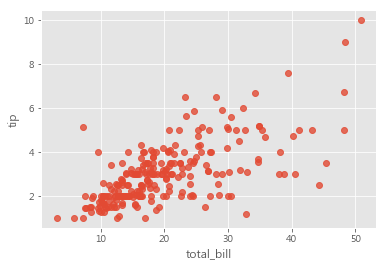

In [252]:
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False)

C:\Users\acorn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


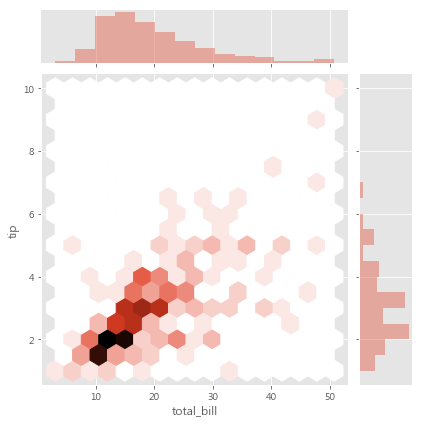

In [254]:
# 산포도와 히스토그램

ax = sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

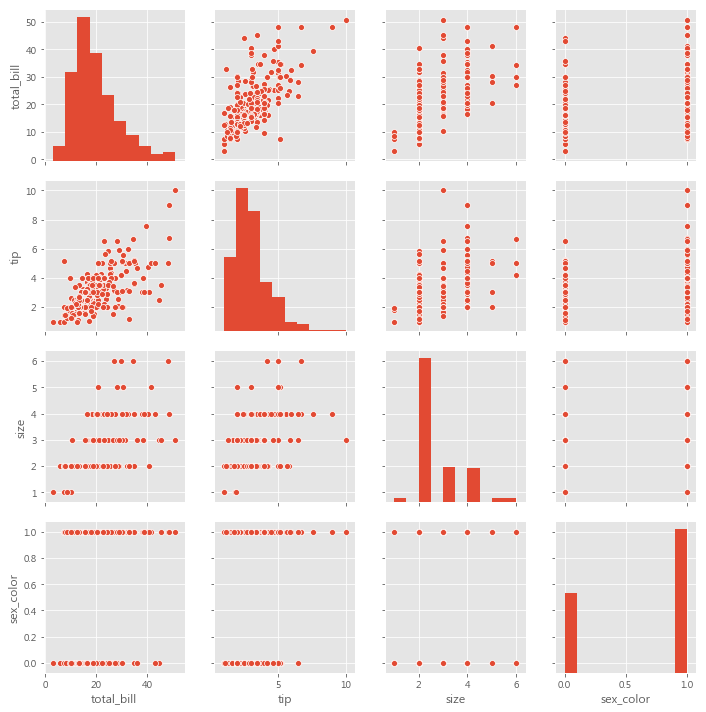

In [255]:
sns.pairplot(tips)